# Projections 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import suppy.projections as pr

## Simple structures

### Projection onto a simple halfspace

Projection a point $\mathbf{x}$ onto the halfspace given by $\langle a,x \rangle \leq b$

Distance to halfspace: 2.0


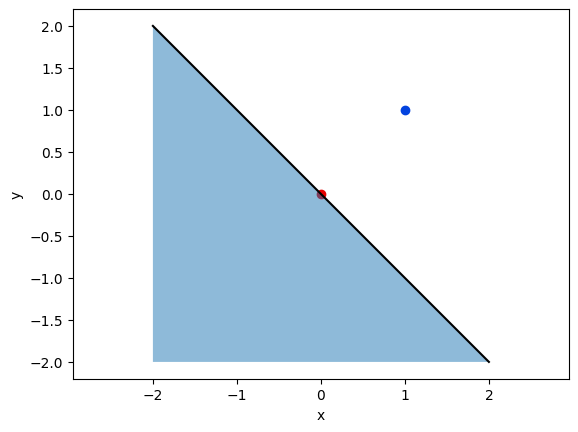

In [6]:
# Halfspace defined through <a, x>  <= b
# Define the normal vector a
a = np.array([1,1])
b = 0
Halfspace = pr.HalfspaceProjection(a, b)
x = np.array([1,1],dtype = float)
print('Distance to halfspace:',Halfspace.proximity(x))
# Define the point to project
x = np.array([1,1],dtype = float)
fig,ax = plt.subplots()
ax.scatter(*x,color = 'xkcd:blue')

proj = Halfspace.project(x)

ax.scatter(*proj,color = 'xkcd:red')
# Visualize the halfspace
xlin = np.linspace(-2, 2, 100)
Halfspace.visualize(ax,xlin)
Halfspace.proximity(x)
#
#ylin = (b-a[0]*xlin)/a[1]
#ax.plot(xlin,ylin, color='black')

# Fill the area above the linear function with blue color
#

# Set the x and y axis labels
plt.xlabel('x')
plt.ylabel('y')
# Show the plot
plt.axis('equal')
plt.show()

### Projection onto a simple ball

Orthogonal projection of a point $\mathbf{x}$ onto a circle/2D ball with center $\mathbf{c}$ and radius $r$.

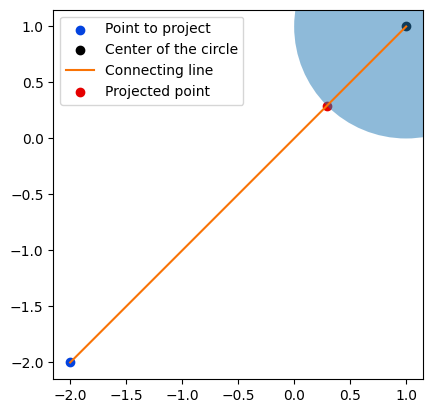

In [7]:
c = np.array([1,1])
r = 1
Ball = pr.BallProjection(c, r)

# Define the point to project
x = np.array([-2,-2],dtype = float)
fig, ax = plt.subplots()

plt.scatter(*x, color='xkcd:blue', label='Point to project')
plt.scatter(*c, color='xkcd:black', label='Center of the circle')
plt.plot([c[0], x[0]], [c[1], x[1]], color='xkcd:orange', label='Connecting line')
proj = Ball.project(x)
plt.scatter(*proj, color='xkcd:red', label='Projected point')

# Visualize the circle
Ball.visualize(ax)

# circle_1 = plt.Circle(c, r, color='beige', alpha=0.5)
# ax.add_patch(circle_1)
ax.set_aspect('equal')

# Add legend
plt.legend()

plt.show()

## Projection onto a band


Projecting the point $\mathbf{x}$ onto the single band given by $lb \leq \langle a,x \rangle \leq ub $

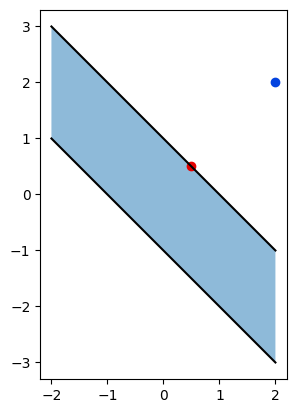

In [8]:
a = np.array([-1,-1])
lb = -1
ub = 1
x_i  = np.linspace(-2,2,100)

# y1 = (lb-a[0]*x_i)/a[1]
# y2 = (ub-a[0]*x_i)/a[1]

# plt.plot(x_i,y1, color = 'black')
# plt.plot(x_i,y2, color = 'black')
# plt.fill_between(x_i, y1, y2, color='beige',label = 'Band',alpha = 0.5)
fig,ax = plt.subplots()
Band_proj = pr.BandProjection(a, lb, ub)


Band_proj.visualize(ax,x_i)

x = np.array([2,2],dtype=float)
plt.scatter(*x,color = 'xkcd:blue')
proj = Band_proj.project(x)
plt.scatter(*proj,color = 'xkcd:red')
#plt.xlim(-2,2)
#plt.ylim(-2,2)

ax.set_aspect('equal')

### Box constraint

In [9]:
lb = np.array([0,0])
ub = np.array([1,1])
Box_proj = pr.BoxProjection(lb, ub)

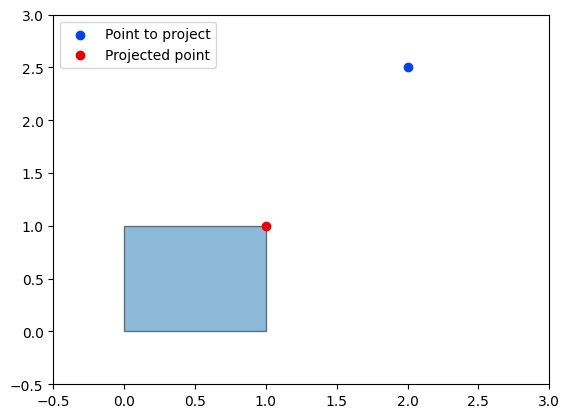

In [10]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

Box_proj.visualize(ax)

x = np.array([2,2.5],dtype = float)
plt.scatter(*x, color='xkcd:blue', label='Point to project')
proj = Box_proj.project(x)
plt.scatter(*proj, color='xkcd:red', label='Projected point')
ax.set_xlim(-0.5,3)
ax.set_ylim(-0.5,3)
plt.legend()
plt.show()


## More complex structures created from the same basic projections

In [11]:
from suppy.utils.plot import plot2D_linear_constraints

### Sequential Halfspace projections

<a id="my-section"></a>

#### Manual projections:

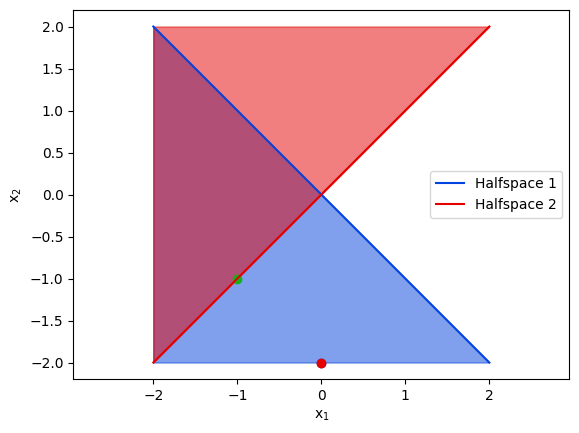

In [12]:
# Halfspace defined through <a, x>  <= b

# Define the normal vector a
a = np.array([1,1])
a2 = np.array([1,-1])
b = 0
Halfspace = pr.HalfspaceProjection(a, b)
Halfspace2 = pr.HalfspaceProjection(a2, b)


# Define the point to project

#plt.scatter(*x,color = 'xkcd:blue')

proj = Halfspace.project(x)

#plt.scatter(*proj,color = 'xkcd:red')
# Visualize the halfspace
xlin = np.linspace(-2, 2, 100)
ylin = (b-a[0]*xlin)/a[1]
ylin2 = (b-a2[0]*xlin)/a2[1]
plt.plot(xlin,ylin, color='xkcd:blue',label = 'Halfspace 1')
plt.plot(xlin,ylin2, color='xkcd:red',label = 'Halfspace 2')


plt.fill_between(xlin, ylin, np.min(ylin), color='xkcd:blue',alpha = 0.5)
plt.fill_between(xlin, ylin2, np.max(ylin2), color='xkcd:red',alpha = 0.5)
#plt.fill_between(xlin, ylin, ylin2, where = ylin2 < ylin, color='beige',alpha = 0.6)


x = np.array([0,-2],dtype = float)
plt.scatter(*x,color = 'xkcd:blue')

proj = Halfspace.project(x)
plt.scatter(*proj,color = 'xkcd:red')

proj = Halfspace2.project(x)
plt.scatter(*proj,color = 'xkcd:green')

# Set the x and y axis labels
plt.xlabel('x$_1$')
plt.ylabel('x$_2$')
# Show the plot
plt.axis('equal')
plt.legend()
plt.show()



#### Predefined class:

In [14]:
A = np.array([[1,1],[1,-1]])
b = np.array([0,0])

Halfspace_direct_seq = pr.SequentialMultiHalfspaceProjection(A, b)

# Define the point to project
x = np.array([1,0],dtype = float)
fig, ax = plt.subplots()

#Plot the halfspaces
plt.plot(xlin,ylin, color='xkcd:blue',label = 'Halfspace 1')
plt.plot(xlin,ylin2, color='xkcd:red',label = 'Halfspace 2')


plt.fill_between(xlin, ylin, np.min(ylin), color='xkcd:blue',alpha = 0.5)
plt.fill_between(xlin, ylin2, np.max(ylin2), color='xkcd:red',alpha = 0.5)


plt.scatter(*x, color='xkcd:blue', label='Point to project')
proj = Halfspace_direct_seq.project(x)
plt.scatter(*proj, color='xkcd:red', label='Projected point')




# Set the x and y axis labels
plt.xlabel('x$_1$')
plt.ylabel('x$_2$')
# Show the plot
plt.axis('equal')
plt.legend()
plt.show()


AttributeError: module 'suppy.projections' has no attribute 'SequentialMultiHalfspaceProjection'

### Simultaneous Halfspace projections

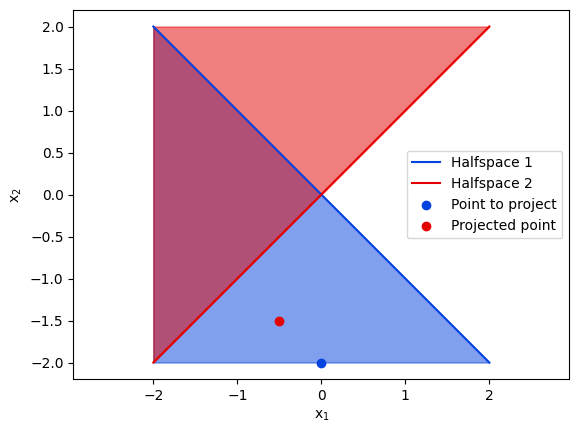

In [ ]:
A = np.array([[1,1],[1,-1]])
b = np.array([0,0])

Halfspace_direct_sim = pr.SimultaneousMultiHalfspaceProjection(A, b)

# Define the point to project
x = np.array([0,-2],dtype = float)
fig, ax = plt.subplots()


plt.plot(xlin,ylin, color='xkcd:blue',label = 'Halfspace 1')
plt.plot(xlin,ylin2, color='xkcd:red',label = 'Halfspace 2')


plt.fill_between(xlin, ylin, np.min(ylin), color='xkcd:blue',alpha = 0.5)
plt.fill_between(xlin, ylin2, np.max(ylin2), color='xkcd:red',alpha = 0.5)


plt.scatter(*x, color='xkcd:blue', label='Point to project')
proj = Halfspace_direct_sim.project(x)
plt.scatter(*proj, color='xkcd:red', label='Projected point')


# Set the x and y axis labels
plt.xlabel('x$_1$')
plt.ylabel('x$_2$')
# Show the plot
plt.axis('equal')
plt.legend()
plt.show()



### Multiband Projection

In [ ]:
A = np.array([[1/2,1/2],[1,0],[1/4,-3/4]])
lb = np.array([0,-0.5,0])
ub = np.array([1,0.5,1])

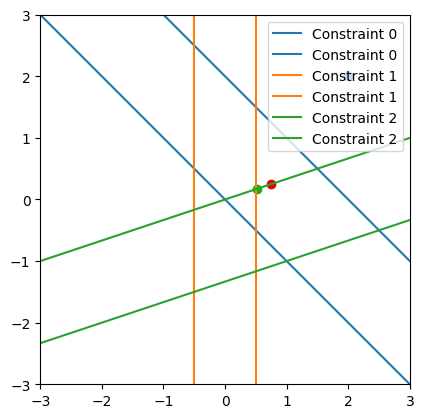

In [ ]:
x = np.linspace(-3,3,100)
ax = plot2D_linear_constraints(x, A, lb, ub)

Band_proj = pr.SequentialMultiBandProjection(A, lb, ub)
x = np.array([2,2], dtype=float)
ax.scatter(*x, color='xkcd:blue', label='Point to project')
proj = Band_proj.project(x)
ax.scatter(*proj, color='xkcd:red', label='First Projected point')
proj = Band_proj.project(x)
ax.scatter(*proj, color='xkcd:green', label='Second Projected point')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect('equal')
plt.show()


## Combined projections

This section explores how to combine any type of projection through assisting classes

### Sequential projections

#### Multihalfspace projection

We use the same Halfspaces as for the [Halfspace projections](#my-section)

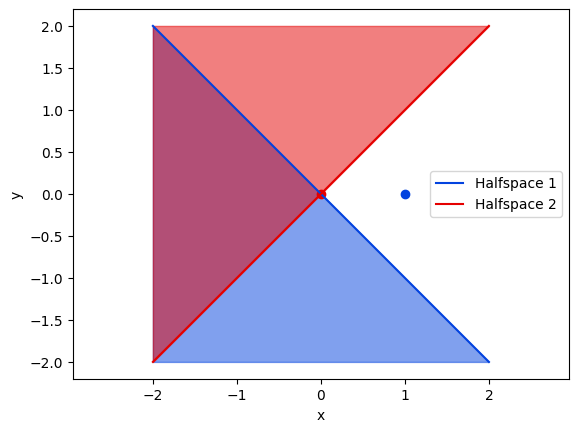

In [ ]:
Combined_Halfspace_proj = pr.SequentialProjection([Halfspace,Halfspace2])


plt.plot(xlin,ylin, color='xkcd:blue',label = 'Halfspace 1')
plt.plot(xlin,ylin2, color='xkcd:red',label = 'Halfspace 2')


plt.fill_between(xlin, ylin, np.min(ylin), color='xkcd:blue',alpha = 0.5)
plt.fill_between(xlin, ylin2, np.max(ylin2), color='xkcd:red',alpha = 0.5)
#plt.fill_between(xlin, ylin, ylin2, where = ylin2 < ylin, color='beige',alpha = 0.6)


x = np.array([1,0],dtype = float)
plt.scatter(*x,color = 'xkcd:blue')



Combined_Halfspace_proj.project(x)
proj = Combined_Halfspace_proj.project(x)
plt.scatter(*proj,color = 'xkcd:red')

# Set the x and y axis labels
plt.xlabel('x')
plt.ylabel('y')
# Show the plot
plt.axis('equal')
plt.legend()
plt.show()

### Simultaneous projection


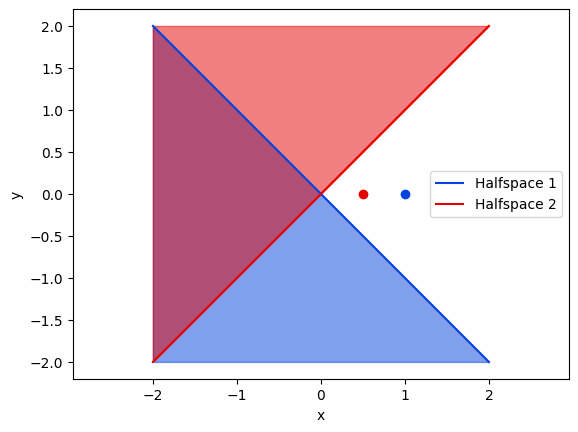

In [ ]:
#### Combined:
Halfspace_combined_sim = pr.SimultaneousProjection([Halfspace, Halfspace2])


plt.plot(xlin,ylin, color='xkcd:blue',label = 'Halfspace 1')
plt.plot(xlin,ylin2, color='xkcd:red',label = 'Halfspace 2')


plt.fill_between(xlin, ylin, np.min(ylin), color='xkcd:blue',alpha = 0.5)
plt.fill_between(xlin, ylin2, np.max(ylin2), color='xkcd:red',alpha = 0.5)
#plt.fill_between(xlin, ylin, ylin2, where = ylin2 < ylin, color='beige',alpha = 0.6)


x = np.array([1,0],dtype = float)
plt.scatter(*x,color = 'xkcd:blue')



proj = Halfspace_combined_sim.project(x)
plt.scatter(*proj,color = 'xkcd:red')

# Set the x and y axis labels
plt.xlabel('x')
plt.ylabel('y')
# Show the plot
plt.axis('equal')
plt.legend()
plt.show()

## Subgradient projections

Besides the orthogonal projections we can also use subgradient projections to project onto sublevel sets $\{\mathbf{x} | f(\mathbf{x})\leq \alpha \}$.
Given that $f(\mathbf{x} )$ is a convex function and has a computable subgradient, the projection is given by:
\begin{equation}
P_{f,\alpha}(x) = x - \frac{(f(x)-\alpha)_{+}}{||{\mathbf{g}(x)||^2}} \mathbf{g}(x)
\end{equation}


### Projection onto a circle using subgradient projections

To demonstrate the method we want to project a point on a circle expressed through a sublevel set $\{\mathbf{x} | f(\mathbf{x})\leq r \}$ where $r$ is the radius of the circle and $f(\mathbf{x})$ the distance of point $\mathbf{x}$ to the center. Therefore for function and gradient it holds that:

\begin{align}
f(\mathbf{x}) & = |\mathbf{x}-\mathbf{c}| \\
g(\mathbf{x}) & = \frac{\mathbf{x}-\mathbf{c}}{|\mathbf{x}-\mathbf{c}|}\\
\end{align}

And the projection has the form 
\begin{align*}
P_{f,\alpha}(x) & = \mathbf{x} - \frac{(f(\mathbf{x})-r)_{+}}{||{\mathbf{g}(\mathbf{x})||^2}} \mathbf{g}(\mathbf{x}) \\
                & = \mathbf{x} - \frac{(|\mathbf{x}-\mathbf{c}| -r)_{+}}{1}\frac{\mathbf{x}-\mathbf{c}}{|\mathbf{x}-\mathbf{c}|}
\end{align*}
which can be reformulated in the orthogonal projection onto a circle.

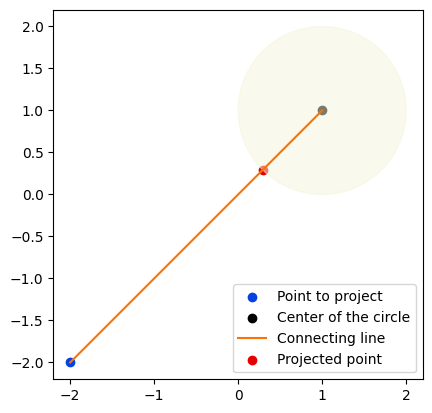

In [ ]:
def func(x,c):
    return np.linalg.norm(x-c)

def grad(x,c):
    return (x-c)/np.linalg.norm(x-c)

# Create the Projection
c = np.array([1,1])
r = 1
func_args = [c]
grad_args = [c]

Circle_Subgradient = pr.SubgradientProjection(func,grad,level = r,func_args = func_args,grad_args = grad_args)
x = np.array([-2,-2],dtype = float)


fig,ax = plt.subplots()

plt.scatter(*x,color = 'xkcd:blue',label = 'Point to project')
plt.scatter(*c,color = 'xkcd:black',label = 'Center of the circle')

plt.plot([c[0],x[0]],[c[1],x[1]],color = 'xkcd:orange', label = 'Connecting line')

proj = Circle_Subgradient.project(x)

plt.scatter(*proj,color = 'xkcd:red',label = 'Projected point')

# Visualize the circle
circle_1 = plt.Circle(c,r, color='beige',alpha = 0.5)
ax.add_patch(circle_1)
ax.set_aspect('equal')
plt.legend()
plt.show()

### EUD

Another example for the subgradient projection is the in Radiotherapy used Equivalent Uniform Dose (EUD) 
\begin{align*}
f(\mathbf{d}) & = \left(\frac{1}{N} \sum^{N}_{i} {d_i^a}  \right)^{1/a}\\
g(\mathbf{d}) & = \left(\frac{1}{N}\right)^{1/a} \left( \sum^{N}_{i} {d_i^a} \right)^{1/a-1} \mathbf{d}^{a-1}\\
\end{align*}
with $\mathbf{d}\geq0$ and $a$ a parameter depending on the structure,

Visualization of the general profil for a 2D dose vector:


Text(0.5, 1.0, 'EUD with a = 10')

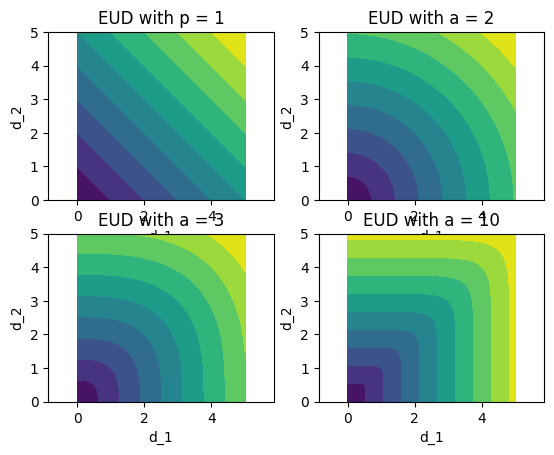

In [ ]:
EUD_1 = pr.EUDProjection(1)
EUD_2 = pr.EUDProjection(2)
EUD_3 = pr.EUDProjection(3)
EUD_10 = pr.EUDProjection(10)

fig,ax = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        ax[i,j].axis('equal')
        ax[i,j].set_xlabel('d_1')
        ax[i,j].set_ylabel('d_2')

xlin = np.linspace(0, 5, 1000)
ylin = np.linspace(0, 5, 1000)      
X, Y = np.meshgrid(xlin, ylin)
XY = np.array([X,Y])

Z1 = EUD_1._func(XY)
Z2 = EUD_2._func(XY)
Z3 = EUD_3._func(XY)
Z10 = EUD_10._func(XY)

ax[0,0].contourf(X,Y,Z1,levels = 10)
ax[0,0].set_title('EUD with p = 1')

ax[0,1].contourf(X,Y,Z2,levels = 10)
ax[0,1].set_title('EUD with a = 2')

ax[1,0].contourf(X,Y,Z3,levels = 10)
ax[1,0].set_title('EUD with a = 3')

ax[1,1].contourf(X,Y,Z10,levels = 10)
ax[1,1].set_title('EUD with a = 10')



Projection onto the sublevel set of the EUD with $EUD\leq 0.75$:

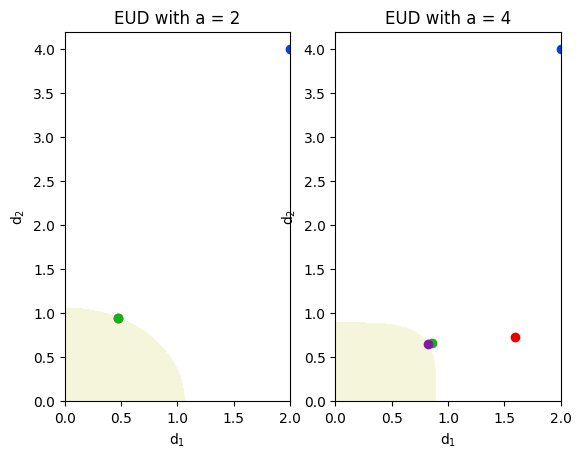

In [ ]:

EUD_2 = pr.EUDProjection(2,0.75)
EUD_4 = pr.EUDProjection(4,0.75)

# plot contours of the EUD
fig,ax = plt.subplots(1,2)

for i in range(2):
    ax[i].set_xlabel('d$_1$')
    ax[i].set_ylabel('d$_2$')

xlin = np.linspace(0, 2, 1000)
ylin = np.linspace(0, 2, 1000)
X, Y = np.meshgrid(xlin, ylin)
XY = np.array([X,Y]) #transform into array for function evaluation


#EUD with a = 2
Z_2 = EUD_2._func(XY)

ax[0].contourf(X,Y,Z_2,levels = [np.min(Z_2),EUD_2.level],colors = ['beige','white'])
ax[0].set_title('EUD with a = 2')

x = np.array([2,4],dtype = float)
ax[0].scatter(*x,color = 'xkcd:blue',label = 'Point to project')
proj = EUD_2.project(x)
ax[0].scatter(*proj,color = 'xkcd:red',label = 'First projection')
proj = EUD_2.project(proj)
ax[0].scatter(*proj,color = 'xkcd:green',label = 'Second projection')


#EUD with a = 4
Z_4 = EUD_4._func(XY)
ax[1].contourf(X,Y,Z_4,levels = [np.min(Z_4),EUD_4.level],colors = ['beige','white'])
ax[1].set_title('EUD with a = 4')

x = np.array([2,4],dtype = float)
ax[1].scatter(*x,color = 'xkcd:blue',label = 'Point to project')
proj = EUD_4.project(x)
ax[1].scatter(*proj,color = 'xkcd:red',label = 'First projection')
proj = EUD_4.project(proj)
ax[1].scatter(*proj,color = 'xkcd:green',label = 'Second projection')

proj = EUD_4.project(proj)
ax[1].scatter(*proj,color = 'xkcd:purple',label = 'Third projection')


#ax[0].set_aspect('equal')
#ax[1].set_aspect('equal')


##  DVH Projections

In [ ]:
x = np.random.rand(10)*100
d_max = 50
a = 0.2 # at most 20% of voxels can be above threshold
DVHProjection = pr.DVHProjection(a,d_max)
x_2 = DVHProjection.project(x)
print(x_2)
DVHProjection.project(x_2)
print(x_2)


[ 5.15889857 50.         50.         98.34581461 11.57983975 31.56461058
 31.99373242 93.58058195 20.12139811 47.42777943]
[ 5.15889857 50.         50.         98.34581461 11.57983975 31.56461058
 31.99373242 93.58058195 20.12139811 47.42777943]
